# 1.0. IMPORTS

In [104]:
# Libraries
import pandas as pd
import numpy as np
import inflection
import math
import seaborn as sns
from matplotlib import pyplot as plt

## 1.1. Helper Functions

## 1.2. Loading Data

In [2]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

# Merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

# 2.0. DESCRIÇÃO DOS DADOS

In [3]:
df1 = df_raw.copy()

## 2.1. Rename Columns

In [4]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 
            'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
            'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))

# Rename
df1.columns = cols_new

## 2.2. Data Dimensions

In [5]:
print('Numeber of rows {}'.format(df1.shape[0]))
print('Numeber of cols {}'.format(df1.shape[1]))

Numeber of rows 1017209
Numeber of cols 18


## 2.3. Data Types

In [6]:
# Change format date
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 2.4. Check NA

In [7]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [95]:
# Max value
df1['competition_distance'].max()

2000000.0

In [96]:
# competition_distance 
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 2000000.0 if math.isnan(x) else x)

# competition_open_since_month
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) 
                                                else x['competition_open_since_month'], axis=1)

# competition_open_since_year                            
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) 
                                                else x['competition_open_since_year'], axis=1)

# promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) 
                                                else x['promo2_since_week'], axis=1)
# promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) 
                                                else x['promo2_since_year'], axis=1)
# promo_interval      
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec', }

# Does not return value, changes directly in column
df1['promo_interval'].fillna(0, inplace=True)

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 
                                                             else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [97]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. Change Types

In [91]:
# Verify Data Types
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [37]:
# Change data types
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

## 1.7. Descriptive Statistical

### 1.7.1. Numerical Attributes

In [92]:
# Numeric Data.
numeric_attributes = df1.select_dtypes(include=['int64', 'float64'])

# Central Tendency - Numeric Data: mean and median.
central_tendency_mean = pd.DataFrame(numeric_attributes.apply(np.mean)).T
central_tendency_median = pd.DataFrame(numeric_attributes.apply(np.median)).T

# Dispersion: std, min, max, range, skew and kurtosis.
dispersion_std = pd.DataFrame(numeric_attributes.apply(np.std)).T
dispersion_min = pd.DataFrame(numeric_attributes.apply(min)).T
dispersion_max = pd.DataFrame(numeric_attributes.apply(max)).T
dispersion_range = pd.DataFrame(numeric_attributes.apply(lambda x: x.max() - x.min())).T
dispersion_skew = pd.DataFrame(numeric_attributes.apply(lambda x: x.skew())).T
dispersion_kurtosis = pd.DataFrame(numeric_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
metrics = pd.concat([dispersion_min, dispersion_max, dispersion_range, dispersion_std,
                    central_tendency_mean, central_tendency_median, dispersion_skew, dispersion_kurtosis]).T.reset_index()

# Rename Columns
metrics.columns = ['Attributes', 'Min', 'Max', 'Range', 'Std', 'Mean', 'Median', 'Skew', 'Kurtosis']

In [98]:
metrics

,Attributes,Min,Max,Range,Std,Mean,Median,Skew,Kurtosis
0,store,1.0,1115.0,1114.0,321.908493,558.429727,558.0,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,1.997390,3.998341,4.0,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,3849.924283,5773.818972,5744.0,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,464.411506,633.145946,609.0,1.598650,7.091773
4,open,0.0,1.0,1.0,0.375539,0.830107,1.0,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.485758,0.381515,0.0,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.383056,0.178647,0.0,1.677842,0.815154
7,competition_distance,20.0,2000000.0,1999980.0,101810.649100,10610.588099,2330.0,19.378002,375.644405
8,competition_open_since_month,1.0,12.0,11.0,3.311085,6.786849,7.0,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,5.515591,2010.324840,2012.0,-7.235657,124.071304


/Users/ramirovsjunior/opt/anaconda3/envs/dsemproducao/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

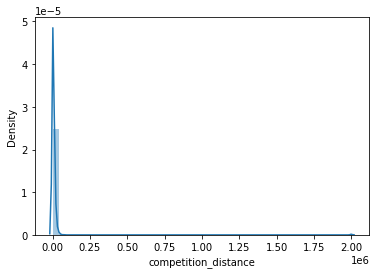

In [65]:
sns.distplot(df1['competition_distance'])

### 1.7.2. Categorical Attributes

In [66]:
# Categorical Data
categorical_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [67]:
# Check Number of Categorical Levels
categorical_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

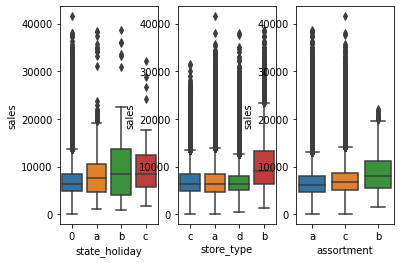

In [110]:
# Filter with effective sales.
effective_sales = df1[(df1['state_holiday'] != 0) & (df1['sales'] > 0)]

# Graphic
plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=effective_sales)

plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=effective_sales)

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=effective_sales)